In [1]:
using Pkg
Pkg.activate(".")
Pkg.add(["LinearAlgebra", "Plots", "Symbolics"])

  Activating project at `~/local_Documents/MLandDeepStudy/src/Chapter3`
    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `~/local_Documents/MLandDeepStudy/src/Chapter3/Project.toml`
  No Changes to `~/local_Documents/MLandDeepStudy/src/Chapter3/Manifest.toml`


In [2]:
using LinearAlgebra

In [3]:
𝐱 = [
    [0, 5], 
    [1, 1], 
    [5, 0],
    [6, 2],
    [2, 6],
    [2, 2], 
]

6-element Vector{Vector{Int64}}:
 [0, 5]
 [1, 1]
 [5, 0]
 [6, 2]
 [2, 6]
 [2, 2]

In [4]:
𝐗 = hcat(fill(1, length(𝐱)), hcat(𝐱...)')

6×3 Matrix{Int64}:
 1  0  5
 1  1  1
 1  5  0
 1  6  2
 1  2  6
 1  2  2

In [5]:
ω = [1, 1, 1, 2, 2, 2] # class

6-element Vector{Int64}:
 1
 1
 1
 2
 2
 2

In [6]:
𝐛₁ = collect(ω .== 1) # label
𝐛₂ = collect(ω .== 2) # label

6-element Vector{Bool}:
 0
 0
 0
 1
 1
 1

In [7]:
𝐰₁ =  𝐗'𝐗 \ 𝐗'𝐛₁

3-element Vector{Float64}:
  1.2804878048780486
 -0.14634146341463414
 -0.14634146341463414

In [8]:
𝐰₂ =  𝐗'𝐗 \ 𝐗'𝐛₂

3-element Vector{Float64}:
 -0.28048780487804875
  0.14634146341463414
  0.14634146341463414

In [9]:
using Plots

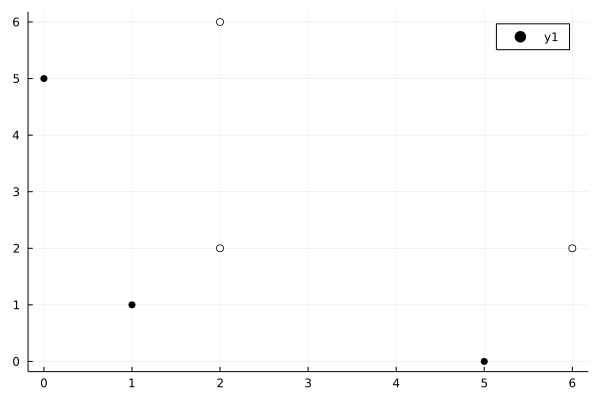

In [10]:
scatter(
    𝐗[:, 2], 𝐗[:, 3], 
    markercolor = ifelse.(𝐛₁, :black, :white)
)

In [11]:
using Symbolics
@variables x₁ x₂

2-element Vector{Num}:
 x₁
 x₂

In [12]:
f(x₁) = Symbolics.solve_for(𝐰₁[1] + 𝐰₁[2] * x₁ + 𝐰₁[3] * x₂ - (𝐰₂[1] + 𝐰₂[2] * x₁ + 𝐰₂[3] * x₂), x₂)
@register f(x₁)

In [13]:
𝐰₁[1] + 𝐰₁[2] * x₁ + 𝐰₁[3] * x₂ - (𝐰₂[1] + 𝐰₂[2] * x₁ + 𝐰₂[3] * x₂)

1.5609756097560974 - 0.2926829268292683x₁ - 0.2926829268292683x₂

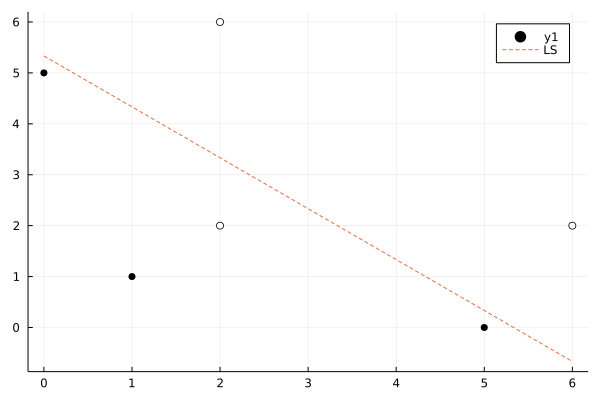

In [14]:
plot!(x -> Symbolics.value(f(x)), label = "LS", linestyle = :dash)

3.3

In [15]:
𝐗 = hcat([
    [1, 1.2], 
    [1, 0.2], 
    [1, -0.2],
    [1, -0.5],
    [1, -1.0],
    [1, -1.5], 
]...)'

6×2 adjoint(::Matrix{Float64}) with eltype Float64:
 1.0   1.2
 1.0   0.2
 1.0  -0.2
 1.0  -0.5
 1.0  -1.0
 1.0  -1.5

In [16]:
ω = [1, 1, 1, 2, 2, 2] # class
𝐛₁ = @. ifelse(ω == 1, 1, -1) # label
𝐛₂ = @. ifelse(ω == 2, 1, -1) # label

6-element Vector{Int64}:
 -1
 -1
 -1
  1
  1
  1

In [17]:
𝐰 =  𝐗'𝐗 \ 𝐗'𝐛₁

2-element Vector{Float64}:
 0.28125000000000006
 0.9375000000000001

大域的最適解について

In [18]:
isposdef(𝐗'𝐗)

true

In [ ]:
経験的に最適解が得られているかを確認する。

In [22]:
function J(X, w, b)
    j = 0.0
    for i in axes(X, 1)
        x = @. X[i, :]
        j += (w'x - b[i])^2
    end
    return j
end

J (generic function with 1 method)

In [26]:
z = [J(𝐗, [i, j], 𝐛₁) for i in -2:0.01:2, j in -2:0.01:2]

401×401 Matrix{Float64}:
 52.48    52.2677  52.0564  51.8461  …  47.1181  47.3044  47.4917  47.68
 52.3126  52.0999  51.8883  51.6776     46.8078  46.9937  47.1807  47.3686
 52.1464  51.9334  51.7214  51.5104     46.4987  46.6842  46.8708  47.0584
 51.9814  51.768   51.5556  51.3443     46.1908  46.376   46.5622  46.7494
 51.8176  51.6039  51.3911  51.1794     45.884   46.0689  46.2547  46.4416
 51.655   51.4409  51.2278  51.0157  …  45.5785  45.763   45.9485  46.135
 51.4936  51.2791  51.0657  50.8532     45.2742  45.4583  45.6435  45.8296
 51.3334  51.1186  50.9048  50.692      44.9711  45.1548  45.3396  45.5254
 51.1744  50.9592  50.745   50.5319     44.6692  44.8526  45.037   45.2224
 51.0166  50.8011  50.5865  50.373      44.3684  44.5515  44.7355  44.9206
 50.86    50.6441  50.4292  50.2153  …  44.0689  44.2516  44.4353  44.62
 50.7046  50.4883  50.2731  50.0588     43.7706  43.9529  44.1363  44.3206
 50.5504  50.3338  50.1182  49.9036     43.4735  43.6554  43.8384  44.0224
  ⋮  

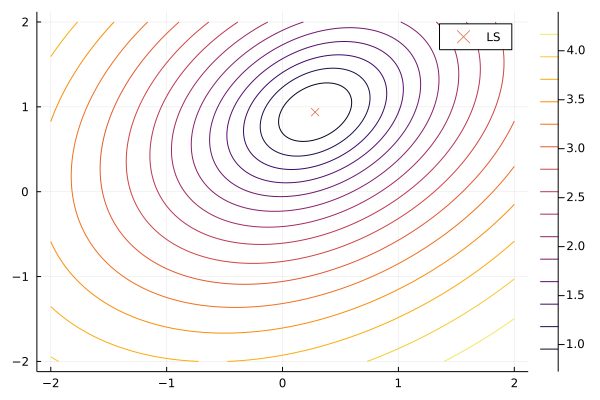

In [35]:
plot(-2:.01:2, -2:.01:2, log.(z'))
scatter!([𝐰[1]], [𝐰[2]], markershape = :x, label = "LS")

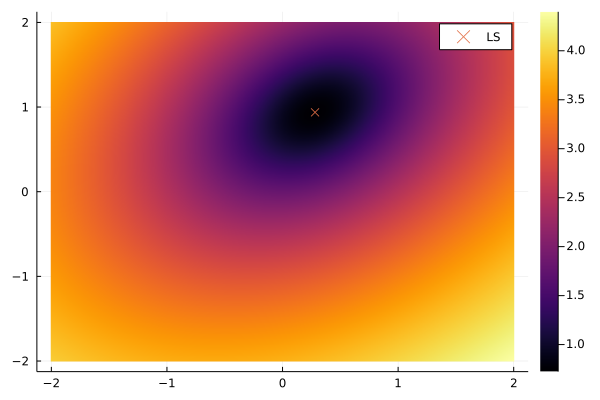

In [36]:
heatmap(-2:.01:2, -2:.01:2, log.(z'))
scatter!([𝐰[1]], [𝐰[2]], markershape = :x, label = "LS")